##Assignment 3 by Ishita Gupta (ID: 49003344)

###Requirements:
>1. [Q1. MNIST Dataset](https://colab.research.google.com/drive/1PP4PXyOSDCeKLhdkNhc2RGRU16A8OS5y#scrollTo=x-4-oJWvIW42&line=9&uniqifier=1)
>2. [Q2. Classification model](https://colab.research.google.com/drive/1PP4PXyOSDCeKLhdkNhc2RGRU16A8OS5y#scrollTo=wss9ZC6IJjOH)
>3. [Q3. Changing the kernel size](https://colab.research.google.com/drive/1PP4PXyOSDCeKLhdkNhc2RGRU16A8OS5y#scrollTo=-ZRtQWowiO0f&line=5&uniqifier=1)
>4. [Q4. Adding batch normalisation](https://colab.research.google.com/drive/1PP4PXyOSDCeKLhdkNhc2RGRU16A8OS5y#scrollTo=pdsnx88JlNMF&line=8&uniqifier=1)



In [0]:
#importing libraries 
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import time
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
import numpy as np

Using TensorFlow backend.


### MNIST Dataset

Here I download the dataset and preprocess it before splitting it into train, validation and test sets by using the train_test_split function to create a 4:1 ratio. Finally I divide the values by 255.0 to normalise it for easier processing.  

In [0]:
#Dataset 
def MNISTdataset():
  #load_data
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
  # reshape dataset to have a single channel
  x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
  x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
  # one hot encode target values
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  #split the data for 4:1 ratio 
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)
  # Change range of pixel values from 0 - 255 to 0 - 1 for easier processing
  x_train = x_train.astype('float32')/ 255.0
  x_val = x_val.astype('float32')/255.0
  x_test = x_test.astype('float32')/ 255.0

  return x_train,y_train,x_val,y_val,x_test,y_test

### Convolution model

Here I define a convolution model with a variable kernel size

In [0]:
# define cnn model
def CNN_network(kernel_size, learning_rate):
  model = Sequential()
  model.add(Conv2D(32, (kernel_size, kernel_size), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(Conv2D(32, (kernel_size, kernel_size), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(lr=learning_rate, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model


In [0]:
def Learning_curve(history_baseline):
  # learning curves
  plt.plot(history_baseline.history['loss'])
  plt.plot(history_baseline.history['val_loss'])
  plt.title('training and validation error')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train loss','val loss'], loc='upper left')
  plt.show()
  
  return 

### Kernel size 5

Here I run the first test with the parameters given in the question and experiment with the learning rate in the next cell based on the results of the validation graph 

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
48000/48000 [==============================] - 7s 142us/step - loss: 2.3085 - acc: 0.1045 - val_loss: 2.3094 - val_acc: 0.0964
Epoch 2/6
48000/48000 [==============================] - 6s 134us/step - loss: 2.3080 - acc: 0.1045 - val_loss: 2.3057 - val_acc: 0.1031
Epoch 3/6
48000/48000 [==============================] - 6s 130us/step - loss: 2.3086 - acc: 0.1043 - val_loss: 2.3089 - val_acc: 0.0965
Epoch 4/6
48000/48000 [==============================] - 6s 133us/step - loss: 2.3094 - acc: 0.1020 - val_loss: 2.3060 - val_acc: 0.1031
Epoch 5/6
48000/48000 [==============================] - 6s 134us/step - loss: 2.3082 - acc: 0.1050 - val_loss: 2.3070 - val_acc: 0.1031
Epoch 6/6
48000/48000 [==============================] - 6s 135us/step - loss: 2.3084 - acc: 0.1049 - val_loss: 2.3047 - val_acc: 0.1144


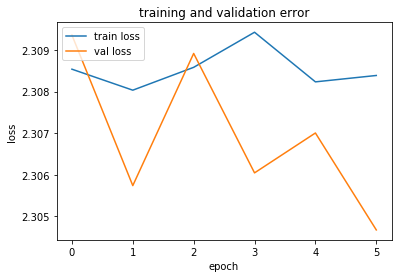

In [0]:
# load dataset
x_train,y_train,x_val,y_val,x_test,y_test = MNISTdataset()
#defining parameters 
kernel_size=5
learning_rate=1e-1
num_epochs=6
# define model
model = CNN_network(kernel_size,learning_rate)
# evaluate model
history_baseline = model.fit(x_train,y_train, epochs = num_epochs, validation_data=(x_val,y_val))
Learning_curve(history_baseline)


The learning rate is decreased and accuracy is calculated

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
48000/48000 [==============================] - 7s 144us/step - loss: 0.9605 - acc: 0.6244 - val_loss: 0.1711 - val_acc: 0.9513
Epoch 2/6
48000/48000 [==============================] - 6s 132us/step - loss: 0.1136 - acc: 0.9667 - val_loss: 0.0922 - val_acc: 0.9729
Epoch 3/6
48000/48000 [==============================] - 6s 131us/step - loss: 0.0683 - acc: 0.9796 - val_loss: 0.0687 - val_acc: 0.9796
Epoch 4/6
48000/48000 [==============================] - 6s 132us/step - loss: 0.0443 - acc: 0.9866 - val_loss: 0.0678 - val_acc: 0.9794
Epoch 5/6
48000/48000 [==============================] - 6s 132us/step - loss: 0.0316 - acc: 0.9905 - val_loss: 0.0566 - val_acc: 0.9828
Epoch 6/6
48000/48000 [==============================] - 6s 131us/step - loss: 0.0244 - acc: 0.9923 - val_loss: 0.0574 - val_acc: 0.9837


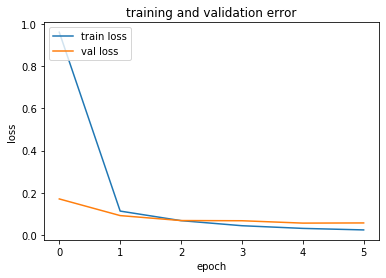

10000/10000 [==============================] - 1s 55us/step
Test Accuracy: 0.9878


In [0]:
# load dataset
x_train,y_train,x_val,y_val,x_test,y_test = MNISTdataset()
#defining parameters 
kernel_size=5
learning_rate=1e-2
num_epochs=6
# define model
model = CNN_network(kernel_size,learning_rate)
# evaluate model
history_baseline = model.fit(x_train,y_train, epochs = num_epochs, validation_data=(x_val,y_val))


Learning_curve( history_baseline)

#Test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)

### Kernel size 3

Here I change the kernel size to 3 and use the best parameters from previous experiment to find the new accuracy  

In [0]:
from torchvision import models
# load dataset
x_train,y_train,x_val,y_val,x_test,y_test = MNISTdataset()
#defining parameters 
kernel_size=3
learning_rate=1e-2
num_epochs=6
# define model
model =models.vgg16()
# evaluate model
history_baseline = model.fit(x_train,y_train, epochs = num_epochs, validation_data=(x_val,y_val))
Learning_curve( history_baseline)

#Test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)

11493376/11490434 [==============================] - 0s 0us/step


AttributeError: ignored

### Kernel size 7

Here I change the kernel size to 7 and calculate accuracy

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
48000/48000 [==============================] - 7s 143us/step - loss: 0.2114 - acc: 0.9307 - val_loss: 0.0828 - val_acc: 0.9742
Epoch 2/6
48000/48000 [==============================] - 6s 129us/step - loss: 0.0560 - acc: 0.9825 - val_loss: 0.0642 - val_acc: 0.9804
Epoch 3/6
48000/48000 [==============================] - 6s 129us/step - loss: 0.0343 - acc: 0.9890 - val_loss: 0.0591 - val_acc: 0.9842
Epoch 4/6
48000/48000 [==============================] - 6s 130us/step - loss: 0.0265 - acc: 0.9918 - val_loss: 0.0503 - val_acc: 0.9852
Epoch 5/6
48000/48000 [==============================] - 6s 127us/step - loss: 0.0210 - acc: 0.9936 - val_loss: 0.0474 - val_acc: 0.9862
Epoch 6/6
48000/48000 [==============================] - 6s 129us/step - loss: 0.0149 - acc: 0.9953 - val_loss: 0.0521 - val_acc: 0.9874


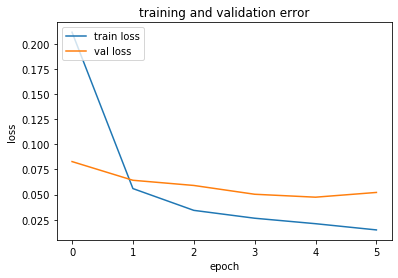

10000/10000 [==============================] - 1s 51us/step
Test Accuracy: 0.9871


In [0]:
# load dataset
x_train,y_train,x_val,y_val,x_test,y_test = MNISTdataset()
#defining parameters 
kernel_size=7
learning_rate=1e-2
num_epochs=6
# define model
model = CNN_network(kernel_size,learning_rate)
# evaluate model
history_baseline = model.fit(x_train,y_train, epochs = num_epochs, validation_data=(x_val,y_val))
Learning_curve( history_baseline)

#Test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)

### Batch normalisation

Here I redefine the CNN network to include a batch normalisation layer before the hidden layer of the MLP 

In [0]:
# define cnn model
def CNN_network(kernel_size, learning_rate):
  model = Sequential()
  model.add(Conv2D(32, (kernel_size, kernel_size), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(Conv2D(32, (kernel_size, kernel_size), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  
  # compile model
  opt = SGD(lr=learning_rate, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model



Train on 48000 samples, validate on 12000 samples
Epoch 1/6
48000/48000 [==============================] - 10s 198us/step - loss: 0.1919 - acc: 0.9419 - val_loss: 0.1213 - val_acc: 0.9639
Epoch 2/6
48000/48000 [==============================] - 8s 176us/step - loss: 0.0823 - acc: 0.9748 - val_loss: 0.0666 - val_acc: 0.9803
Epoch 3/6
48000/48000 [==============================] - 8s 174us/step - loss: 0.0659 - acc: 0.9800 - val_loss: 0.0643 - val_acc: 0.9809
Epoch 4/6
48000/48000 [==============================] - 8s 176us/step - loss: 0.0555 - acc: 0.9827 - val_loss: 0.0716 - val_acc: 0.9805
Epoch 5/6
48000/48000 [==============================] - 8s 174us/step - loss: 0.0464 - acc: 0.9857 - val_loss: 0.0586 - val_acc: 0.9842
Epoch 6/6
48000/48000 [==============================] - 8s 175us/step - loss: 0.0406 - acc: 0.9872 - val_loss: 0.0639 - val_acc: 0.9818


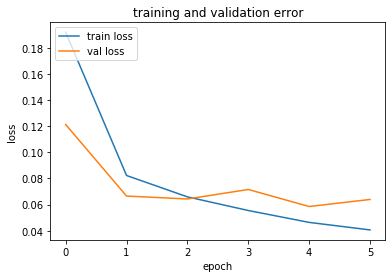

10000/10000 [==============================] - 1s 64us/step
Test Accuracy: 0.9826


In [0]:
# load dataset
x_train,y_train,x_val,y_val,x_test,y_test = MNISTdataset()
#defining parameters 
kernel_size=5
learning_rate=1e-2
num_epochs=6
# define model
model = CNN_network(kernel_size,learning_rate)
# evaluate model
history_baseline = model.fit(x_train,y_train, epochs = num_epochs, validation_data=(x_val,y_val))
Learning_curve( history_baseline)

#Test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)